<a href="https://colab.research.google.com/github/BerkeYrcr/Deep-learning-test-google-colab/blob/main/qr_scan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yolov5 Custom dataset eğitimi**

# **Kurulum**

In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # repostory'i klonluyoruz
%cd yolov5
%pip install -qr requirements.txt # gerekli kütüphaneleri install ediyoruz
%pip install -q roboflow #roboflow u install ediyoruz

import torch
import os
from IPython.display import Image, clear_output  # resimleri görüntülemek için

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})") #hangi ekran kartını kullandığımızı yazdırıyoruz

Cloning into 'yolov5'...
remote: Enumerating objects: 14840, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 14840 (delta 127), reused 155 (delta 110), pack-reused 14655
Receiving objects: 100% (14840/14840), 13.82 MiB | 32.61 MiB/s, done.
Resolving deltas: 100% (10217/10217), done.
/content/yolov5
     |████████████████████████████████| 182 kB 28.4 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 1.6 MB 66.8 MB/s 
     |████████████████████████████████| 42 kB 879 kB/s 
     |████████████████████████████████| 145 kB 55.8 MB/s 
     |████████████████████████████████| 138 kB 67.3 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 67 kB 7.3 MB/s 
     |████████████████████████████████| 178 kB 76.2 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
Setup complete. Using torch 1.13.0+cu116 (Tesla T4)


# **Roboflowu aktif ediyoruz ve roboflowdaki verisetimizi indiriyoruz**

In [3]:
from roboflow import Roboflow 
rf = Roboflow(model_format="yolov5", notebook="ultralytics") 
# environment'ı kuruyoruz
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
#roboflowdan aldığımız api kodlarını kopyalıyoruz çalıştırınca indirecek
rf = Roboflow(api_key="7vXEPUGzaKswGlwleHmN")
project = rf.workspace("savasaniha").project("droness-wk9ba")
dataset = project.version(3).download("yolov5")

# **Modelin eğitimi**

In [ ]:
# 416 resmi 16 lık batchler halinde 100 epochda eğitecek saatler sürebilir lütfen sabırlı olun ve aralıklarla ekranın kapanmaması için ekrana basınız.
!python train.py --img 640 --batch 8 --epochs 400 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

# **Modelin başarı oranını grafikller halinde bakıyoruz**

In [ ]:
# tensorboard'ı başlatıyoruz

#"runs" isimli dosyanın içine kaydediyoruz
%load_ext tensorboard
%tensorboard --logdir runs

# **Test verilerini deniyoruz**

In [7]:
#test resimlerimizi modele sokuyoruz ve sonuçlar en sonda belirtilen dosya konumuna kaydediliyor
#her farklı resim veya video eklediğinizde en sondaki exp1 exp2 diye artar. runs/detect/exp
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source {dataset.location}/valid/images

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/datasets/droness-3/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-46-g96a71b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/11 /content/datasets/droness-3/valid/images/15188861-1080xauto_jpg.rf.e276497e5af1c8ff79c2bf15b426d32d.jpg: 416x416 1 droness, 8.1ms
image 2/11 /content/datasets/droness-3/valid/images/20221122_162244_jpg.rf.7a7fb8bff3719e1c51d8d8564e68aa43.jpg: 416x416 (no detections), 8.1ms
image 3/11 /content/datase

# **Test verileri ekranda gösteriyoruz**

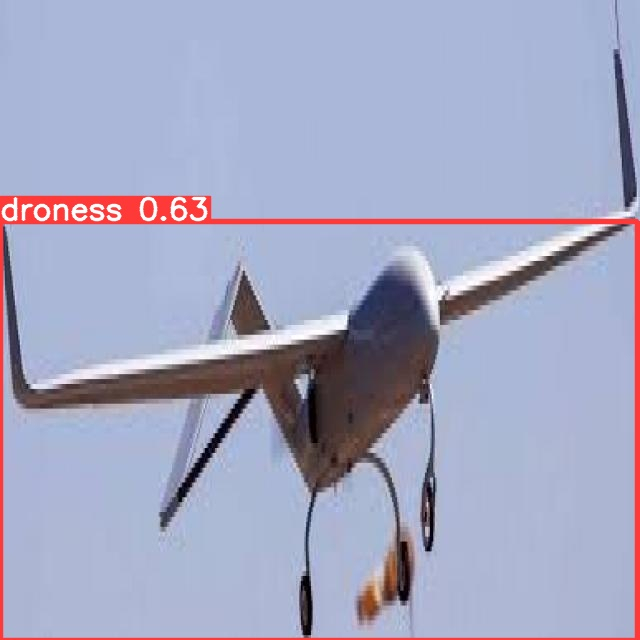

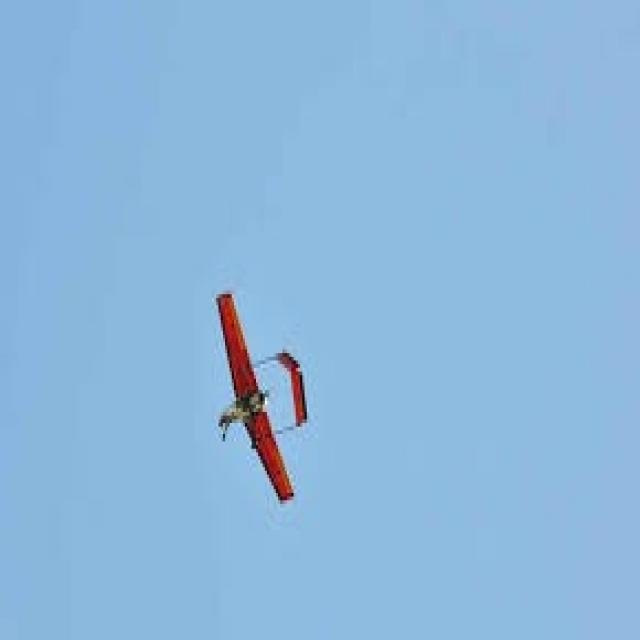

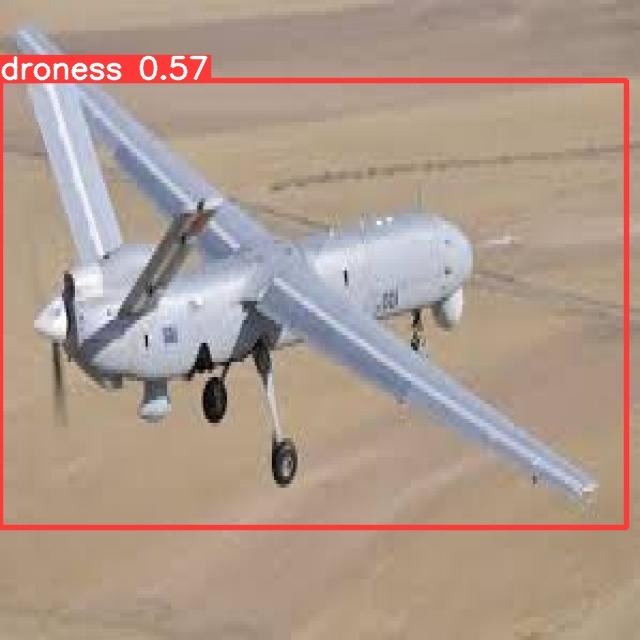

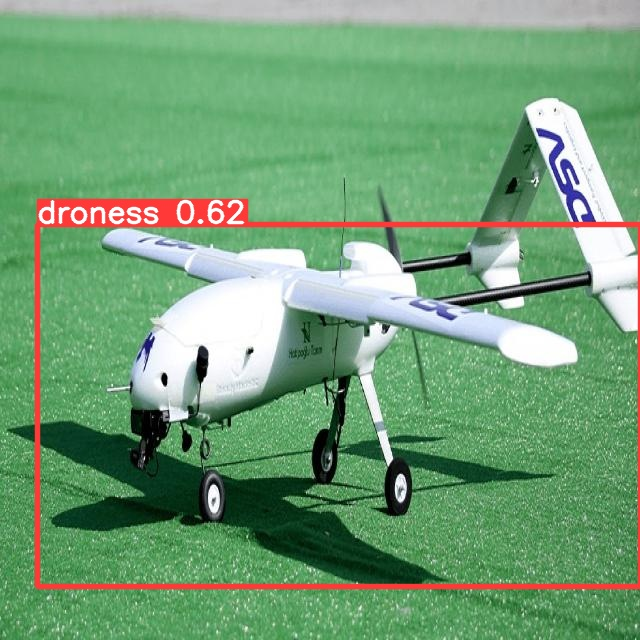

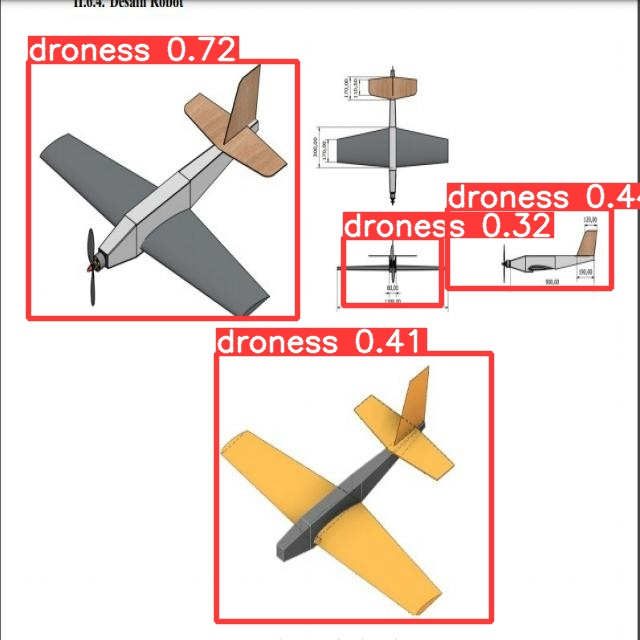

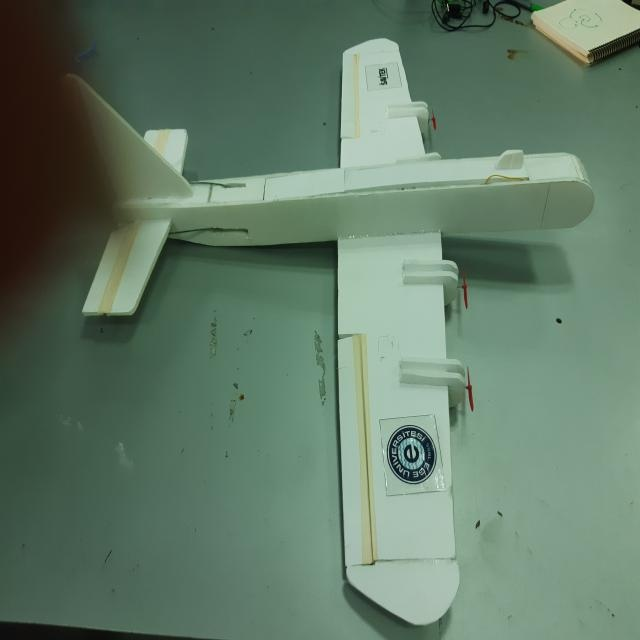

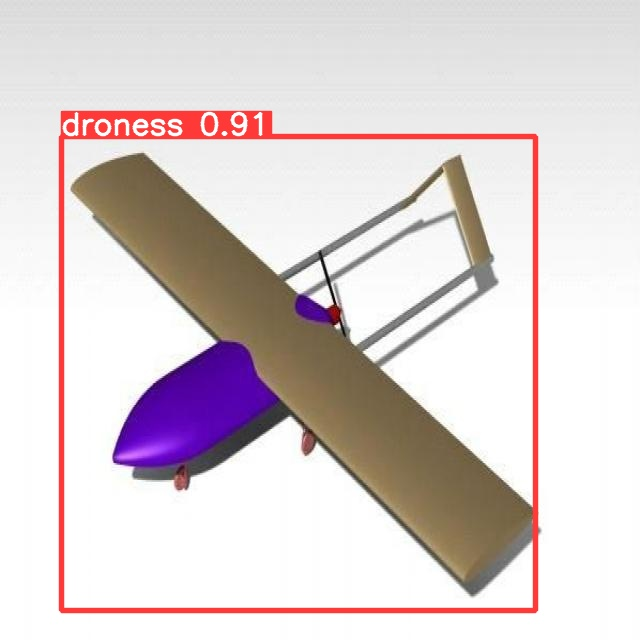

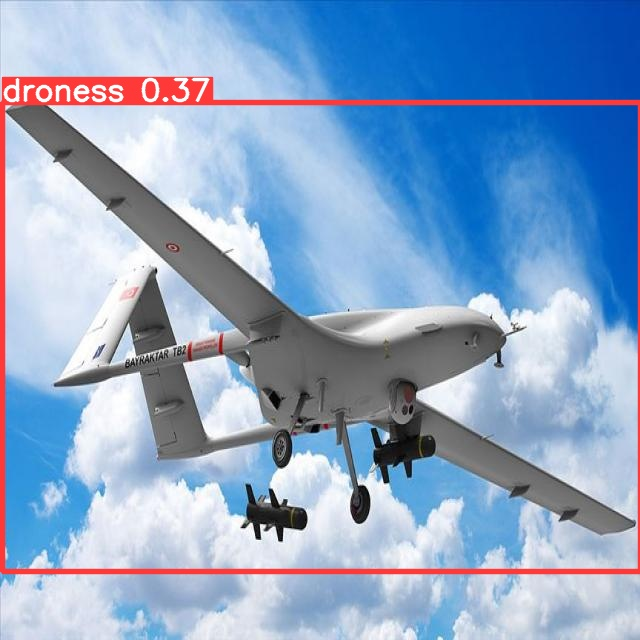

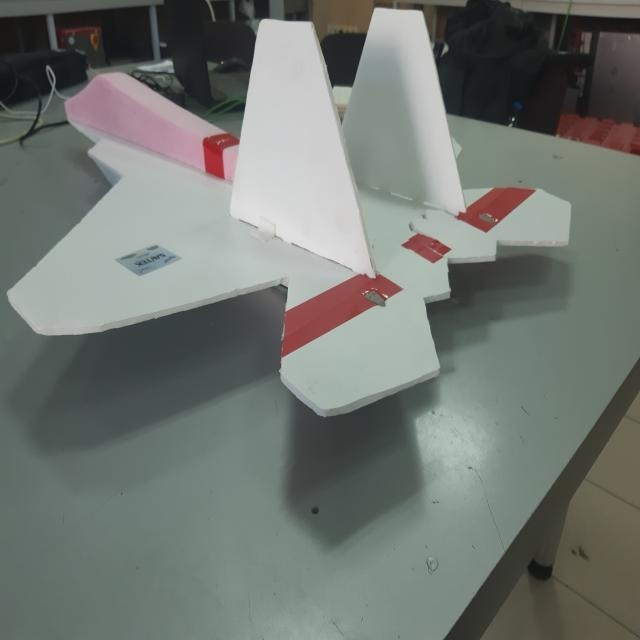

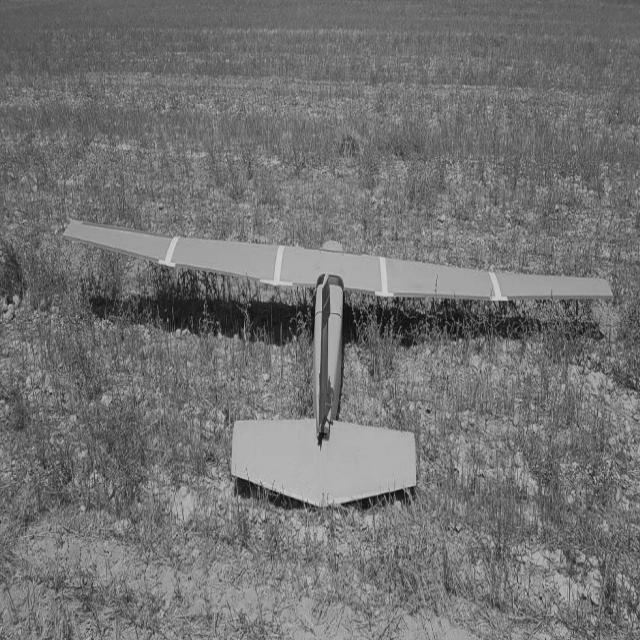

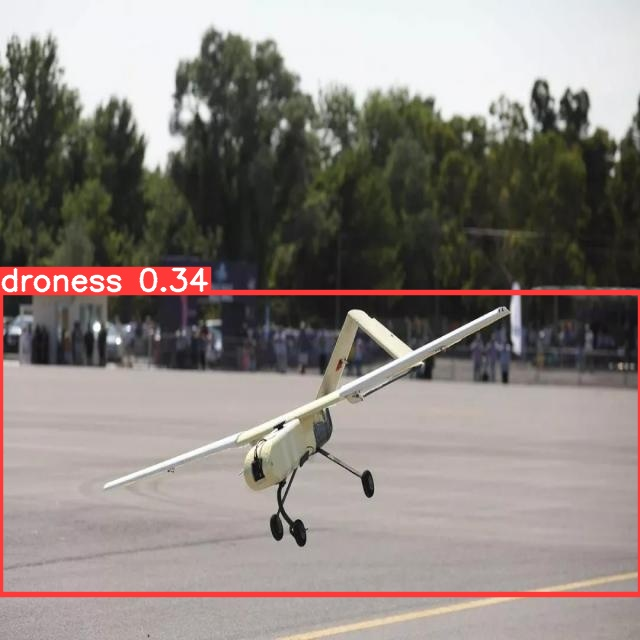

In [8]:

#modelden çıkmış olan tüm test verilerini ekrana bastırarak sonuçları inceliyoruz.

import glob
from IPython.display import Image, display

i = 0
# lütfen glob.glob un içine doğru dosya konumunu yazınız üst satırda en altta yazan results saved to runs/detects/exp1 veya runs/detects/exp2 veya runs/detects/exp3
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #dosya uzantısını resimlerinizin formatına göre değiştirin jpg olmak zorunda değil.
    i += 1

    if i < 12:
      display(Image(filename=imageName))
      print("\n")

# **Modeli kaydediyoruz**

In [9]:
#Modelin ağırlıklarını daha sonra kullanmak için bilgisayarımıza kaydediyoruz
from google.colab import files
files.download('/content/yolov5/runs/train')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
!pip install -r /content/yolov5/requirements.txt coremltools onnx onnx-simplifier onnxruntime-gpu openvino-dev tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 21.9 MB/s 
     |████████████████████████████████| 13.5 MB 68.9 MB/s 
     |████████████████████████████████| 2.0 MB 68.0 MB/s 
     |████████████████████████████████| 115.3 MB 1.2 MB/s 
     |████████████████████████████████| 5.8 MB 77.2 MB/s 
     |████████████████████████████████| 13.1 MB 54.8 MB/s 
     |████████████████████████████████| 237 kB 76.1 MB/s 
     |████████████████████████████████| 46 kB 4.6 MB/s 
     |████████████████████████████████| 3.2 MB 60.1 MB/s 
     |████████████████████████████████| 36.4 MB 149 kB/s 
     |████████████████████████████████| 33.8 MB 266 kB/s 
     |████████████████████████████████| 86 kB 6.8 MB/s 
     |████████████████████████████████| 51 kB 8.5 MB/s 
  Created wheel for jstyleson: filename=jstyleson-0.0.2-py3-none-any.whl size=2401 sha256=1b921d50fe5bcacac659d10fbb1389e4617e00844e174023586ce870d675

In [13]:
pip install nvidia-tensorrt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 774.4 MB 15 kB/s 
     |████████████████████████████████| 728.5 MB 5.7 kB/s 
     |████████████████████████████████| 417.9 MB 29 kB/s 
     |████████████████████████████████| 875 kB 68.1 MB/s 


In [28]:
!python export.py --device 0 --weights /content/yolov5/qrcode.pt --include engine

export: data=data/coco128.yaml, weights=['/content/yolov5/qrcode.pt'], imgsz=[640, 640], batch_size=1, device=0, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['engine']
YOLOv5 🚀 v7.0-46-g96a71b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/yolov5/qrcode.pt with output shape (1, 25200, 6) (13.6 MB)

ONNX: starting export with onnx 1.12.0...
ONNX: export success ✅ 0.9s, saved as /content/yolov5/qrcode.onnx (27.2 MB)

TensorRT: starting export with TensorRT 8.4.1.5...
[12/21/2022-10:35:47] [TRT] [I] [MemUsageChange] Init CUDA: CPU +0, GPU +0, now: CPU 0, GPU 1296 (MiB)
[12/21/2022-10:35:49] [TRT] [I] [MemUsageChange] Init builder kernel library: CPU +0, GPU

In [ ]:
!python benchmarks.py --weights yolov5s.pt --img 640